In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)
df['next_4_day_mean_temp'] = df_original_data['mean_temp'].shift(-4)
df['next_5_day_mean_temp'] = df_original_data['mean_temp'].shift(-5)
df['next_6_day_mean_temp'] = df_original_data['mean_temp'].shift(-6)
df['next_7_day_mean_temp'] = df_original_data['mean_temp'].shift(-7)

In [5]:
df.dropna(inplace=True)

In [6]:
del df['date']

#### cloud_cover processing

In [7]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [8]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [9]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [10]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-10-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [11]:
df['snow_depth'].value_counts()

0.0     14929
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
0.4         2
12.0        2
11.0        2
9.0         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [12]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [13]:
df['snow_depth'].value_counts()

0.0    14929
1.0      131
Name: snow_depth, dtype: int64

#### change the precipitation into category value¶

In [14]:
df['precipitation'].value_counts()

0.00     7905
0.20     1005
0.40      452
0.10      313
0.60      296
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [15]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-15-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [16]:
df['precipitation'].value_counts()

0    7905
1    4249
2    2335
3     567
4       4
Name: precipitation, dtype: int64

In [17]:
df['cloud_cover'] = df['cloud_cover'].astype('category')
df['snow_depth'] = df['snow_depth'].astype('category')

<ipython-input-17-22873bf672c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cloud_cover'] = df['cloud_cover'].astype('category')
<ipython-input-17-22873bf672c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snow_depth'] = df['snow_depth'].astype('category')


In [18]:
df.dtypes

cloud_cover             category
sunshine                 float64
global_radiation         float64
max_temp                 float64
mean_temp                float64
min_temp                 float64
precipitation           category
pressure                 float64
snow_depth              category
next_1_day_mean_temp     float64
next_2_day_mean_temp     float64
next_3_day_mean_temp     float64
next_4_day_mean_temp     float64
next_5_day_mean_temp     float64
next_6_day_mean_temp     float64
next_7_day_mean_temp     float64
dtype: object

In [19]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

scaler = MinMaxScaler()

df.loc[:, features_to_normalize] = scaler.fit_transform(df.loc[:, features_to_normalize])

<ipython-input-19-e7d70e1dab10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, features_to_normalize] = scaler.fit_transform(df.loc[:, features_to_normalize])


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr


X = df.drop(['next_1_day_mean_temp','next_2_day_mean_temp','next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp'], axis=1)
y = df[['next_1_day_mean_temp', 'next_2_day_mean_temp', 'next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp']]




# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [21]:
# 打印划分后的数据集大小
print("train dataset:", X_train.shape)
print("validation dataset:", X_val.shape)
print("test dataset:", X_test.shape)

train dataset: (9638, 9)
validation dataset: (2410, 9)
test dataset: (3012, 9)


In [22]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def SVR_fitness_function(params):

    # Defince the parameters
    kernel = ['linear', 'sigmoid', 'rbf'][int(params[0])]
    #kernel = ['linear', 'linear', 'linear', 'linear'][int(params[0])]
    C = params[1]
    gamma = params[2]
    epsilon = params[3]

    svr_model = MultiOutputRegressor(SVR(kernel = kernel, C = C, gamma = gamma, epsilon = epsilon, verbose = 3))
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)


    return mse


In [23]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=c5c6e434a22a376428e13b5dc10ea80fa1f3d2227223dc1ae6c7c7ad5852d373
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 The best solution found:
 [ 0.         93.04117653  9.29334922  0.63772315]

 Objective function:
 6.933772149593599


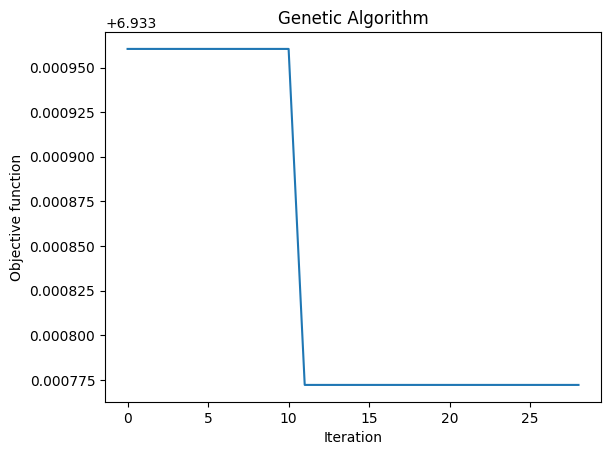

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga



varbound = np.array([          [0, 2],              # kernel
                     [0.1, 100],            # C
                     [0.1, 10],            # gamma
                     [0.001, 1]             # epsilon
                     ])


# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 50, 'population_size': 5, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=SVR_fitness_function, dimension=4, variable_type='real',
           variable_type_mixed  = np.array(['int', 'real', 'real', 'real']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']

In [23]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error


# Defince the parameters
kernel = ['linear', 'sigmoid', 'rbf'][int(0)]
#kernel = ['linear', 'linear', 'linear', 'linear'][int(params[0])]
C = 93.04117653
gamma = 9.29334922
epsilon = 0.63772315

svr_model = MultiOutputRegressor(SVR(kernel = kernel, C = C, gamma = gamma, epsilon = epsilon, verbose = 3))
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

mdae = median_absolute_error(y_test, y_pred)

diff = np.abs((y_test - y_pred) / y_test)
diff.replace([np.inf, -np.inf], np.nan, inplace=True)
diff.dropna(inplace=True)
mape = np.mean(np.mean(diff)*100)


n = y_test.shape[1]
rmspe_scores = []
for i in range(n):
    y_obs = y_test.iloc[:, i]
    y_predict = y_pred[:, i]
    diff = ((y_obs - y_predict) / y_obs) ** 2
    diff.replace([np.inf, -np.inf], np.nan, inplace=True)
    diff.dropna(inplace=True)
    rmspe = np.sqrt(np.mean(diff)) * 100
    rmspe_scores.append(rmspe)
rmspe = np.mean(rmspe_scores)

correlations = []
for i in range(y_test.shape[1]):
    pearson_corr, _ = pearsonr(y_test.iloc[:, i], y_pred[:,i])
    correlations.append(pearson_corr)
mean_pearson_corr = np.mean(correlations)


n = y_test.shape[1]
ia_scores = []
for i in range(n):
    y_obs = y_test.iloc[:, i]
    y_predict = y_pred[:,i]
    y_obs_avg = np.mean(y_obs)

    numerator = np.sum((y_predict - y_obs)**2)
    denominator = np.sum((y_obs_avg - y_obs)**2)
    ia = 1 - (numerator / denominator)
    ia_scores.append(ia)
d = np.mean(ia_scores)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {mae:.4f}')
print(f'MAE: {rmse:.4f}')
print(f'MdAE: {mdae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSPE: {rmspe:.4f}')
print(f'Pearson Coefficient: {mean_pearson_corr:.4f}')
print(f'Index of Agreement (IoA): {d:.4f}')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]MSE: 6.6225
RMSE: 1.9685
MAE: 2.5734
MdAE: 1.6631
MAPE: 39.0060
RMSPE: 181.1101
Pearson Coefficient: 0.8887
Index of Agreement (IoA): 0.7921


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
